In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

In [2]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "investment_survey.csv"
data = pd.read_csv(file_path)

In [3]:
data.head(5)

,Gender,Age,Working_professional,Annual_income,Mode_of_investment,Investment_per_month,Motivation_cause,Resources_used,Goal_for_investment,Duration_to_save(in_Years),Mode_of_investment_numeric
0,Male,19,0,0,"Banking - RD, FD",200,Family member,Family members/Friends,Wealth generation,10,0
1,Female,24,0,0,"Banking - RD, FD",1000,Social media/ Articles,Mobile applications,Wealth generation,3,0
2,Male,24,1,400000,"Stocks - Intraday, long term",5000,Social media/ Articles,News articles / Current affairs,Planning for finacial freedom after Retirement,10,8
3,Male,22,1,150000,Mutual Funds,2000,Agents/Investment brokers,News articles / Current affairs,Wealth generation,10,5
4,Male,25,1,250000,Mutual Funds,2000,Self Interest,Books,Wealth generation,15,5


# Data Exploration

In [4]:
data.shape

(100, 11)

In [5]:
data.columns

Index(['Gender', 'Age', 'Working_professional', 'Annual_income',
       'Mode_of_investment', 'Investment_per_month', 'Motivation_cause',
       'Resources_used', 'Goal_for_investment', 'Duration_to_save(in_Years)',
       'Mode_of_investment_numeric'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      100 non-null    object
 1   Age                         100 non-null    int64 
 2   Working_professional        100 non-null    int64 
 3   Annual_income               100 non-null    int64 
 4   Mode_of_investment          100 non-null    object
 5   Investment_per_month        100 non-null    int64 
 6   Motivation_cause            100 non-null    object
 7   Resources_used              100 non-null    object
 8   Goal_for_investment         100 non-null    object
 9   Duration_to_save(in_Years)  100 non-null    int64 
 10  Mode_of_investment_numeric  100 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 8.7+ KB


In [7]:
data.isna().any()

,0
Gender,False
Age,False
Working_professional,False
Annual_income,False
Mode_of_investment,False
Investment_per_month,False
Motivation_cause,False
Resources_used,False
Goal_for_investment,False
Duration_to_save(in_Years),False


In [8]:
data.isnull().sum()

,0
Gender,0
Age,0
Working_professional,0
Annual_income,0
Mode_of_investment,0
Investment_per_month,0
Motivation_cause,0
Resources_used,0
Goal_for_investment,0
Duration_to_save(in_Years),0


In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,Age,Working_professional,Annual_income,Investment_per_month,Duration_to_save(in_Years),Mode_of_investment_numeric
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,25.370000,0.590000,166440.800000,2863.100000,7.830000,4.420000
std,5.781641,0.494311,161676.882399,4052.254565,4.467741,3.042394
min,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,22.000000,0.000000,0.000000,1000.000000,5.000000,2.000000
50%,24.000000,1.000000,150000.000000,2000.000000,8.000000,5.000000
75%,27.000000,1.000000,300000.000000,3000.000000,10.000000,8.000000
max,56.000000,1.000000,600000.000000,30000.000000,25.000000,8.000000


# Explanatory Data Analysis

In [11]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [12]:
fig = px.histogram(data, x = 'Annual_income', nbins = 15,
                   title = 'Distribution Of Annual Income As Percent')
fig.update_traces(marker_color = 'lavender', marker_line_color = 'purple',
                   marker_line_width = 1)
fig.update_layout(title = {'font_color' : 'red', 'x' : 0.5, 'y' : 0.9,
                           'xanchor' : 'center', 'yanchor' : 'top'},
                  font_color = 'black')
fig.show()

In [13]:
mean = np.mean(data['Annual_income'])
median = np.median(data['Annual_income'])
skewness = stats.skew(data['Annual_income'])

print('Mean of annual income is: ', mean)
print('Median of annual income is: ', median)
print('Skewness of annual income is: ', skewness)

Mean of annual income is:  166440.8
Median of annual income is:  150000.0
Skewness of annual income is:  0.3815130891836121


In [14]:
fig = px.box(data, y = 'Annual_income', title = 'Detection Of Outlier')
fig.update_traces(fillcolor = 'linen', line_color = 'black', boxmean = True)
fig.update_layout(title = {'font_color' : 'green', 'x' : 0.5, 'y' : 0.9,
                           'xanchor' : 'center', 'yanchor' : 'top'},
                  font_color = 'black')
fig.show()

In [15]:
names = ['Working', 'Non-working']
fig = px.pie(values = data['Working_professional'].value_counts(), names = names,
             title = 'Proportion Of Working Professional')
fig.update_traces(marker_colors = ['green', 'red'], marker_line_width = 2,
                  marker_line_color = 'lavenderblush', textinfo = 'label+percent')
fig.update_layout(title = {'font_color' : 'black', 'x' : 0.5, 'y' : 0.9,
                           'xanchor' : 'center', 'yanchor' : 'top'},
                  legend_title = {'text' : 'Working Professional',
                                  'font_color' : 'black'})
fig.show()


In [16]:
fig = px.pie(data, values = 'Working_professional', names = 'Gender',
             title = 'Proportion Of Genderwise Working Professional')
fig.update_traces(marker_colors = ['orange', 'purple'], marker_line_width = 2,
                  marker_line_color = 'lavenderblush', textinfo = 'label+percent')
fig.update_layout(title = {'font_color' : 'blue', 'x' : 0.5, 'y' : 0.9,
                           'xanchor' : 'center', 'yanchor' : 'top'},
                  legend_title = {'text' : 'Gender', 'font_color' : 'blue'})
fig.show()

In [17]:
fig = px.histogram(data, y = 'Working_professional', x = 'Age', color = 'Gender',
                   text_auto = True,
                   title = 'Genderwise Working Professional According To Different Age')
fig.update_traces(marker_line_color = 'fuchsia', marker_line_width = 1)
fig.update_layout(title = {'font_color' : 'green', 'x' : 0.5, 'y' : 0.9,
                           'xanchor' : 'center', 'yanchor' : 'top'},
                  font_color = 'black', legend_title_font_color = 'green')
fig.show()

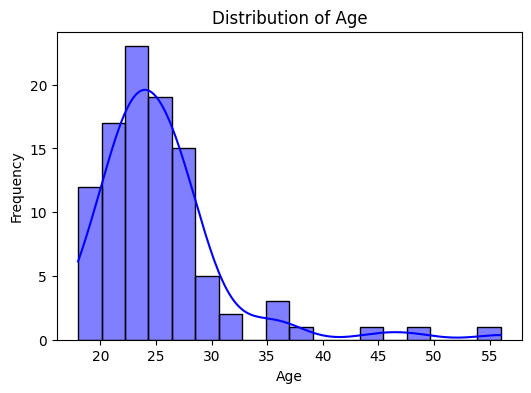

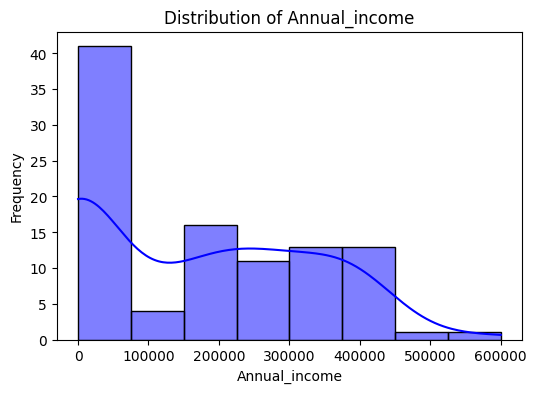

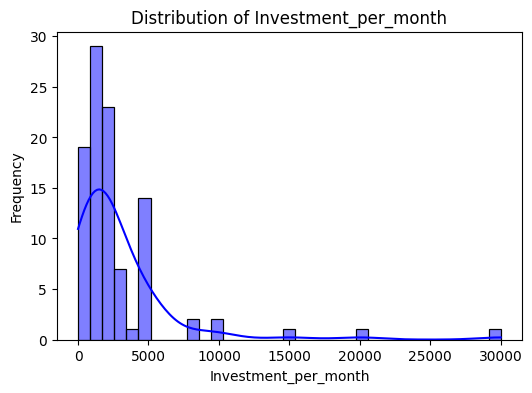

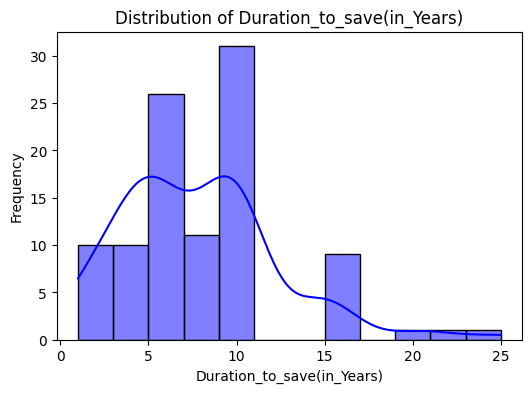

In [18]:
# Distribution of Numerical Features
numeric_columns = ["Age", "Annual_income", "Investment_per_month", "Duration_to_save(in_Years)"]

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

<ipython-input-19-9cbf5eb2189c>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




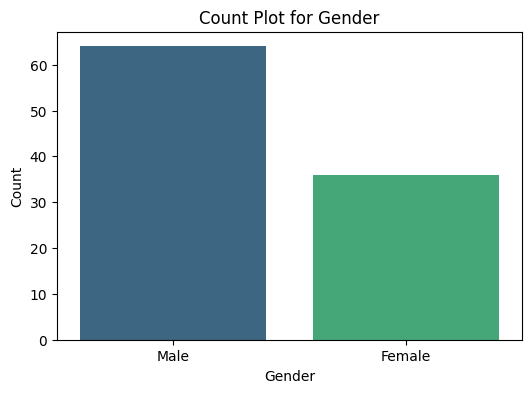

<ipython-input-19-9cbf5eb2189c>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




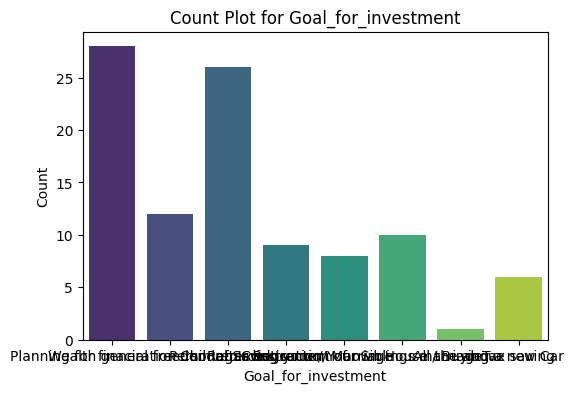

In [19]:
# Count Plot for Categorical Features
categorical_columns = ["Gender", "Goal_for_investment"]

for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[column], palette='viridis')
    plt.title(f"Count Plot for {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

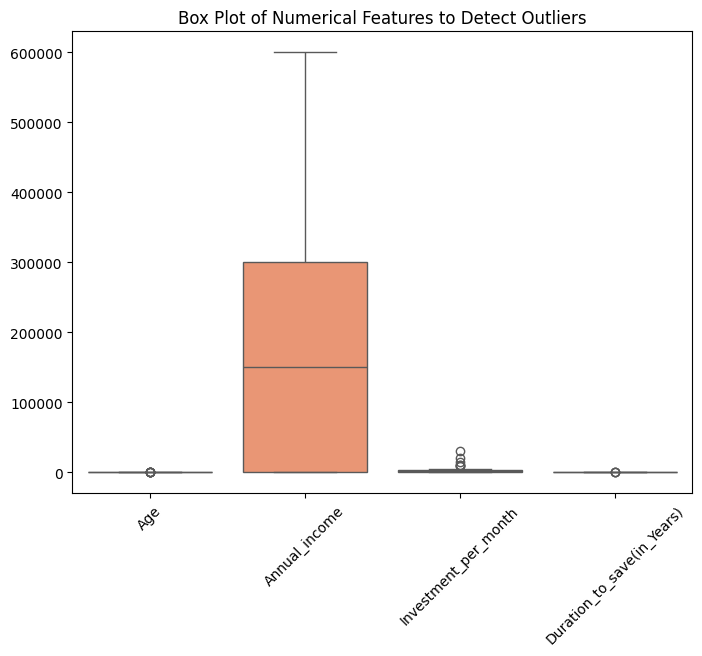

In [20]:
# Box Plot to Identify Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[numeric_columns], palette="Set2")
plt.title("Box Plot of Numerical Features to Detect Outliers")
plt.xticks(rotation=45)
plt.show()

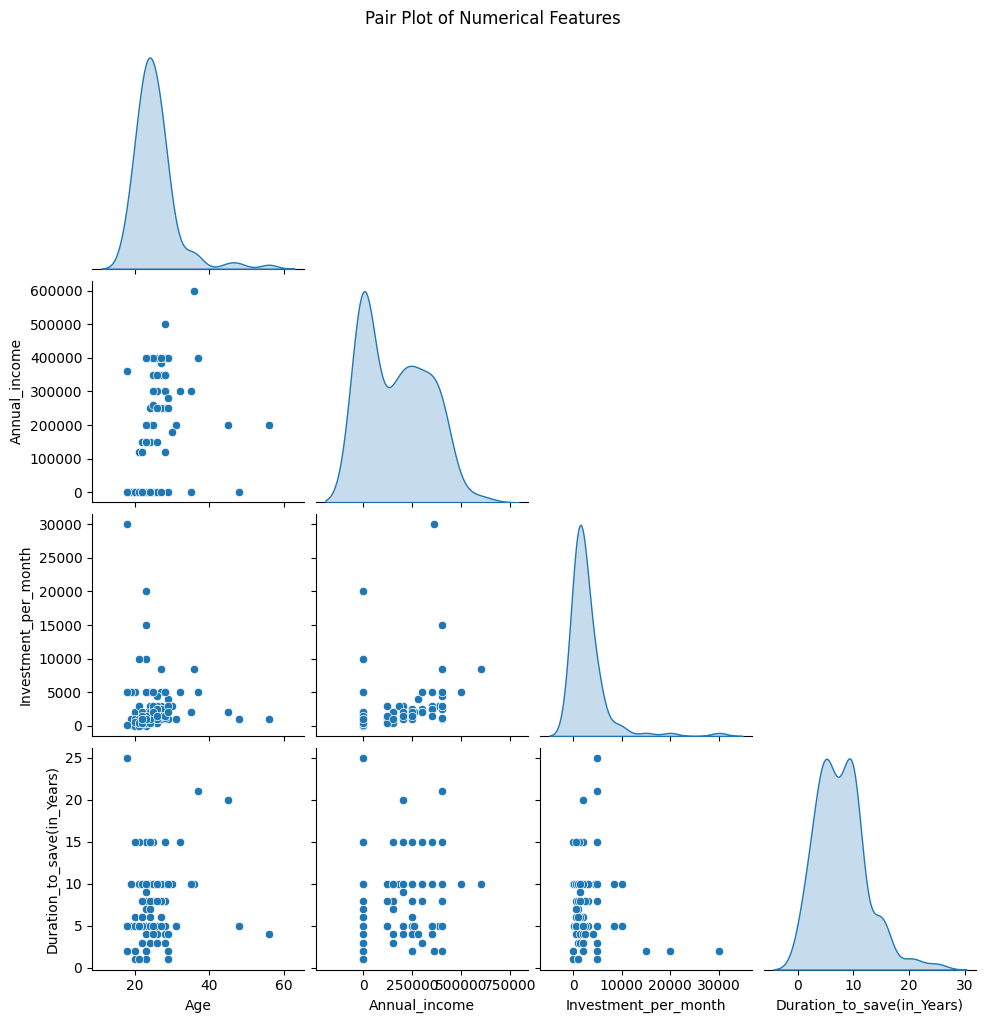

In [21]:
# Pair Plot to Explore Feature Relationships
sns.pairplot(data[numeric_columns], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

In [22]:
fig = px.scatter(data,  y = 'Investment_per_month', x = 'Annual_income',
                 title = 'Relation Between Annual Income And Investment Per Month')
fig.update_traces(marker_color = 'mistyrose', marker_line_width = 1, marker_size = 9)
fig.update_layout(title = {'font_color' : 'green', 'x' : 0.5, 'y' : 0.9,
                           'xanchor' : 'center', 'yanchor' : 'top'},
                  font_color = 'black')
fig.show()

In [23]:
correlation = data.corr(numeric_only = True)
correlation

,Age,Working_professional,Annual_income,Investment_per_month,Duration_to_save(in_Years),Mode_of_investment_numeric
Age,1.000000,0.368176,0.359833,-0.075775,0.118209,-0.044527
Working_professional,0.368176,1.000000,0.816991,-0.028809,0.215105,0.263425
Annual_income,0.359833,0.816991,1.000000,0.267550,0.182452,0.177668
Investment_per_month,-0.075775,-0.028809,0.267550,1.000000,-0.133461,-0.024588
Duration_to_save(in_Years),0.118209,0.215105,0.182452,-0.133461,1.000000,0.040233
Mode_of_investment_numeric,-0.044527,0.263425,0.177668,-0.024588,0.040233,1.000000


In [24]:
fig = px.imshow(correlation, text_auto = '.3f', aspect = 'auto',
                title = 'Correlation Matrix', color_continuous_scale = 'Oranges')
fig.update_layout(title = {'font_color' : 'burlywood', 'x' : 0.5, 'y' : 0.9,
                           'xanchor' : 'center', 'yanchor' : 'top'},
                  font_color = 'brown')
fig.show()

# Data Normalization

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [26]:
data['Investment_per_month'] = data['Investment_per_month'].replace('Nil', 0)
data['Duration_to_save(in_Years)'] = data['Duration_to_save(in_Years)'].replace('Nil', 0)

In [27]:
data['Investment_per_month'] = data['Investment_per_month'].astype('int')
data['Duration_to_save(in_Years)'] = data['Duration_to_save(in_Years)'].astype('int')

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Check unique values in 'mode_of_investment' column
print(data['Mode_of_investment'].unique())

# Initialize LabelEncoder to convert categorical labels to numeric values
label_encoder = LabelEncoder()

# Transform 'mode_of_investment' column to numeric values
data['Mode_of_investment_numeric'] = label_encoder.fit_transform(data['Mode_of_investment'])

# Print the mapping of original labels to numeric values
print("Label encoding mapping for 'Mode_of_investment':")
for original, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{original} -> {encoded}")

# Now, apply Min-Max normalization to the numeric columns
numeric_columns = ['Annual_income', 'Investment_per_month', 'Duration_to_save(in_Years)', 'Mode_of_investment_numeric']  # Add any other numeric columns here
scaler = MinMaxScaler()

# Normalize the selected numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Print the normalized data
print(data[numeric_columns].head())


['Banking - RD, FD' 'Stocks - Intraday, long term' 'Mutual Funds'
 'Crypto currency' 'Not prepared '
 'Gold / Any other Materialistic investment' 'Marketing '
 'Real estate, Bonds' 'Chit fund']
Label encoding mapping for 'Mode_of_investment':
Banking - RD, FD -> 0
Chit fund -> 1
Crypto currency -> 2
Gold / Any other Materialistic investment -> 3
Marketing  -> 4
Mutual Funds -> 5
Not prepared  -> 6
Real estate, Bonds -> 7
Stocks - Intraday, long term -> 8
   Annual_income  Investment_per_month  Duration_to_save(in_Years)  \
0       0.000000              0.006667                    0.375000   
1       0.000000              0.033333                    0.083333   
2       0.666667              0.166667                    0.375000   
3       0.250000              0.066667                    0.375000   
4       0.416667              0.066667                    0.583333   

   Mode_of_investment_numeric  
0                       0.000  
1                       0.000  
2                       

# Data Training

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Assuming you already have 'data' as your DataFrame

# Step 1: List of categorical columns to encode (not including the target column)
categorical_columns = ['Gender', 'Motivation_cause', 'Resources_used', 'Goal_for_investment']

# Apply One-Hot Encoding to categorical columns (excluding target column)
X = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Step 2: Label Encoding for the target variable ('Mode_of_investment')
mode_of_investment_encoder = LabelEncoder()
data['Mode_of_investment_numeric'] = mode_of_investment_encoder.fit_transform(data['Mode_of_investment'])

# Separate features (X) and target (y)
X = X.drop(columns=["Mode_of_investment", "Mode_of_investment_numeric"])  # Drop the target column
y = data["Mode_of_investment_numeric"]  # Target variable

# Step 3: Check for classes with only one sample and filter them out
class_counts = y.value_counts()
classes_with_one_sample = class_counts[class_counts == 1].index.tolist()

# If classes with one sample exist, print them and remove them from the data
if classes_with_one_sample:
    print(f"Classes with only one sample: {classes_with_one_sample}")
    mask = ~y.isin(classes_with_one_sample)  # Create a mask to filter out those classes
    X = X[mask]
    y = y[mask]

# Step 4: Normalize the feature columns (X)
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Step 5: Handle class imbalance using SMOTE
# Set n_neighbors to a lower value to avoid error when there are few samples in a class
smote = SMOTE(random_state=42, k_neighbors=3)  # Reducing n_neighbors to 3
X_balanced, y_balanced = smote.fit_resample(X_normalized, y)

# Step 6: Train-Test Split (stratified split to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.1, random_state=42, stratify=y_balanced)

# Optional: Check the distribution of the classes in train and test sets to ensure stratification worked
print("Training set class distribution:\n", y_train.value_counts())
print("Test set class distribution:\n", y_test.value_counts())

# Now you can proceed to train your models.


Classes with only one sample: [6, 4, 1]
Training set class distribution:
 Mode_of_investment_numeric
0    26
8    26
7    26
3    26
2    26
5    26
Name: count, dtype: int64
Test set class distribution:
 Mode_of_investment_numeric
3    3
2    3
8    3
7    3
5    3
0    3
Name: count, dtype: int64


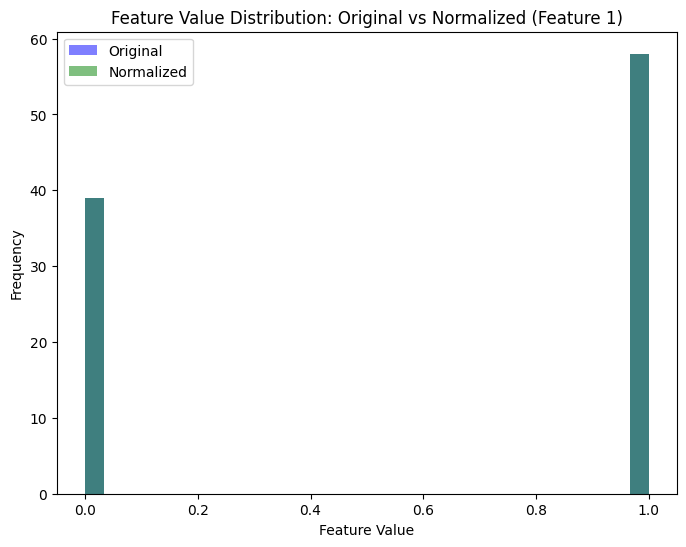

In [30]:
import matplotlib.pyplot as plt

# Ensure X is a NumPy array (normalized data)
if isinstance(X, pd.DataFrame):
    X_array = X.values
else:
    X_array = X

# Plot original vs. normalized feature
feature_index = 1  # Index of the feature to visualize (e.g., 'Annual_income')
plt.figure(figsize=(8, 6))

# Plot original feature (before normalization) - Use the column from original data
plt.hist(X_array[:, feature_index], bins=30, alpha=0.5, label="Original", color='blue')

# Plot normalized feature - Since X_array is already normalized, use it for plotting
plt.hist(X_array[:, feature_index], bins=30, alpha=0.5, label="Normalized", color='green')

plt.title(f"Feature Value Distribution: Original vs Normalized (Feature {feature_index})")
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [31]:
# Reverse the encoding for predictions
y_train_original = mode_of_investment_encoder.inverse_transform(y_train)

# Reverse the encoding for the true values
y_test_original = mode_of_investment_encoder.inverse_transform(y_test)

# Print the original labels for better understanding
print(f"Predicted labels (original): {y_train_original}")
print(f"True labels (original): {y_test_original}")


Predicted labels (original): ['Banking - RD, FD' 'Stocks - Intraday, long term' 'Real estate, Bonds'
 'Gold / Any other Materialistic investment'
 'Gold / Any other Materialistic investment' 'Banking - RD, FD'
 'Real estate, Bonds' 'Stocks - Intraday, long term' 'Banking - RD, FD'
 'Crypto currency' 'Banking - RD, FD' 'Real estate, Bonds'
 'Crypto currency' 'Gold / Any other Materialistic investment'
 'Stocks - Intraday, long term' 'Crypto currency' 'Real estate, Bonds'
 'Mutual Funds' 'Crypto currency' 'Mutual Funds'
 'Stocks - Intraday, long term' 'Banking - RD, FD' 'Banking - RD, FD'
 'Banking - RD, FD' 'Stocks - Intraday, long term'
 'Gold / Any other Materialistic investment' 'Banking - RD, FD'
 'Gold / Any other Materialistic investment' 'Real estate, Bonds'
 'Real estate, Bonds' 'Stocks - Intraday, long term' 'Banking - RD, FD'
 'Gold / Any other Materialistic investment' 'Crypto currency'
 'Banking - RD, FD' 'Crypto currency'
 'Gold / Any other Materialistic investment' 'Mutual

In [32]:
data.head(5)

,Gender,Age,Working_professional,Annual_income,Mode_of_investment,Investment_per_month,Motivation_cause,Resources_used,Goal_for_investment,Duration_to_save(in_Years),Mode_of_investment_numeric
0,Male,19,0,0.000000,"Banking - RD, FD",0.006667,Family member,Family members/Friends,Wealth generation,0.375000,0
1,Female,24,0,0.000000,"Banking - RD, FD",0.033333,Social media/ Articles,Mobile applications,Wealth generation,0.083333,0
2,Male,24,1,0.666667,"Stocks - Intraday, long term",0.166667,Social media/ Articles,News articles / Current affairs,Planning for finacial freedom after Retirement,0.375000,8
3,Male,22,1,0.250000,Mutual Funds,0.066667,Agents/Investment brokers,News articles / Current affairs,Wealth generation,0.375000,5
4,Male,25,1,0.416667,Mutual Funds,0.066667,Self Interest,Books,Wealth generation,0.583333,5


# Apply ML Models

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Logistic Regression**

Logistic Regression Accuracy: 83.33%


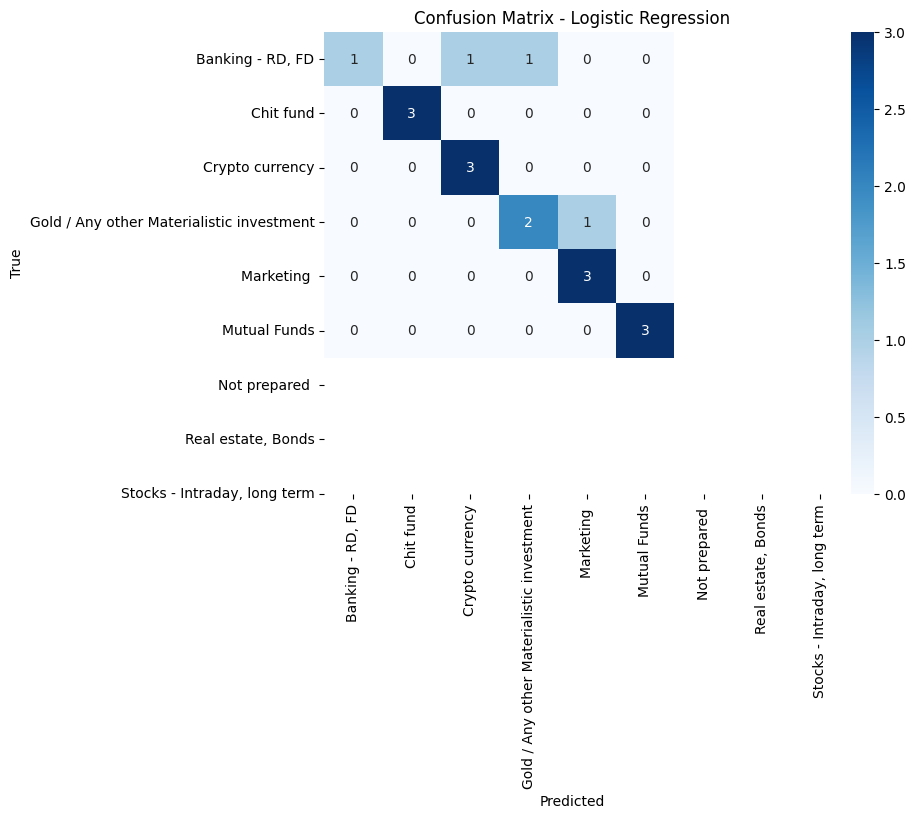

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=mode_of_investment_encoder.classes_, yticklabels=mode_of_investment_encoder.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


**Random Forest**

Random Forest Accuracy: 72.22%


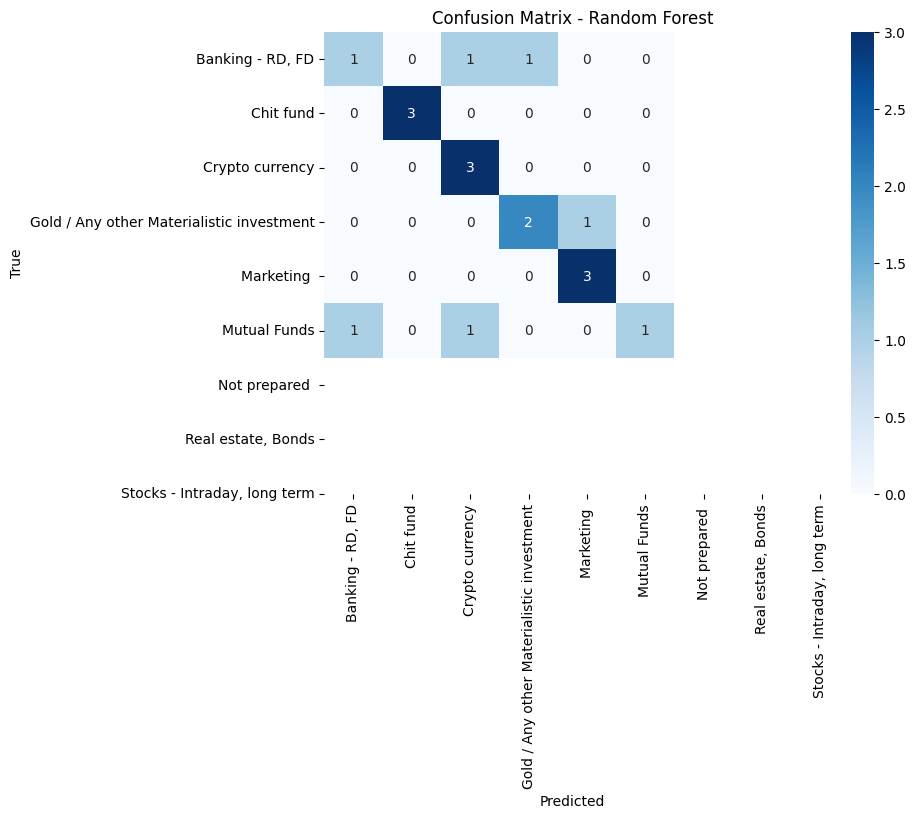

In [35]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=mode_of_investment_encoder.classes_, yticklabels=mode_of_investment_encoder.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Support Vector Machine**

SVM Accuracy: 83.33%


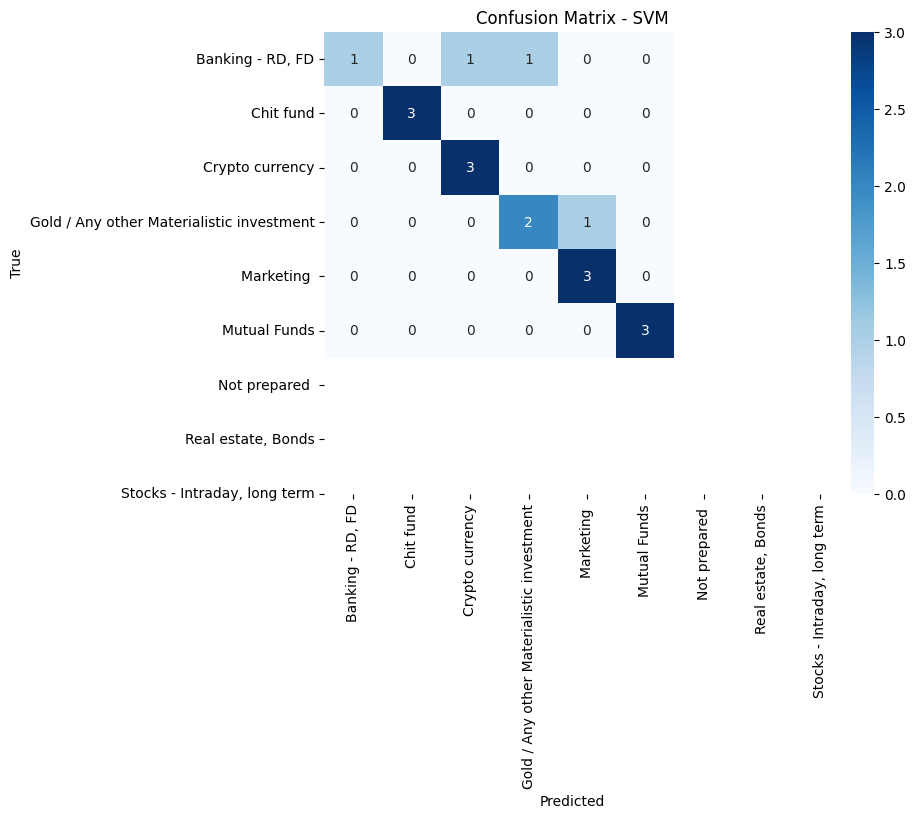

In [36]:
# Train Support Vector Machine (SVM) model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=mode_of_investment_encoder.classes_, yticklabels=mode_of_investment_encoder.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**K-Nearest Neighbour**

K-Nearest Neighbors Accuracy: 61.11%


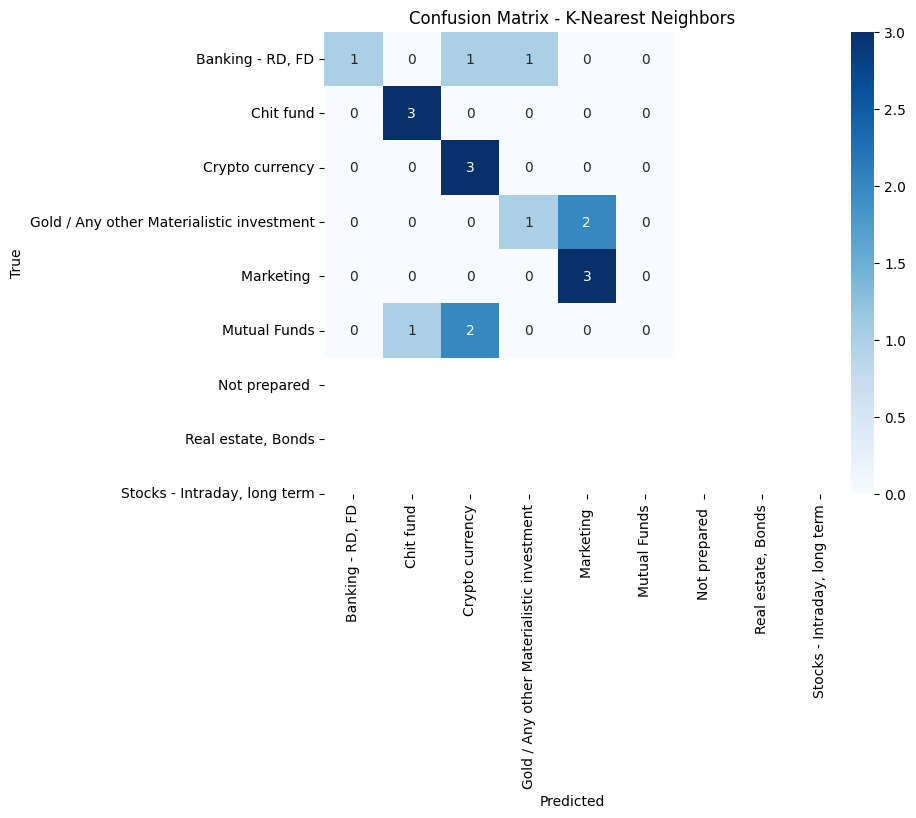

In [37]:
# Train K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn * 100:.2f}%")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=mode_of_investment_encoder.classes_, yticklabels=mode_of_investment_encoder.classes_)
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Decision Tree**

Decision Tree Accuracy: 66.67%


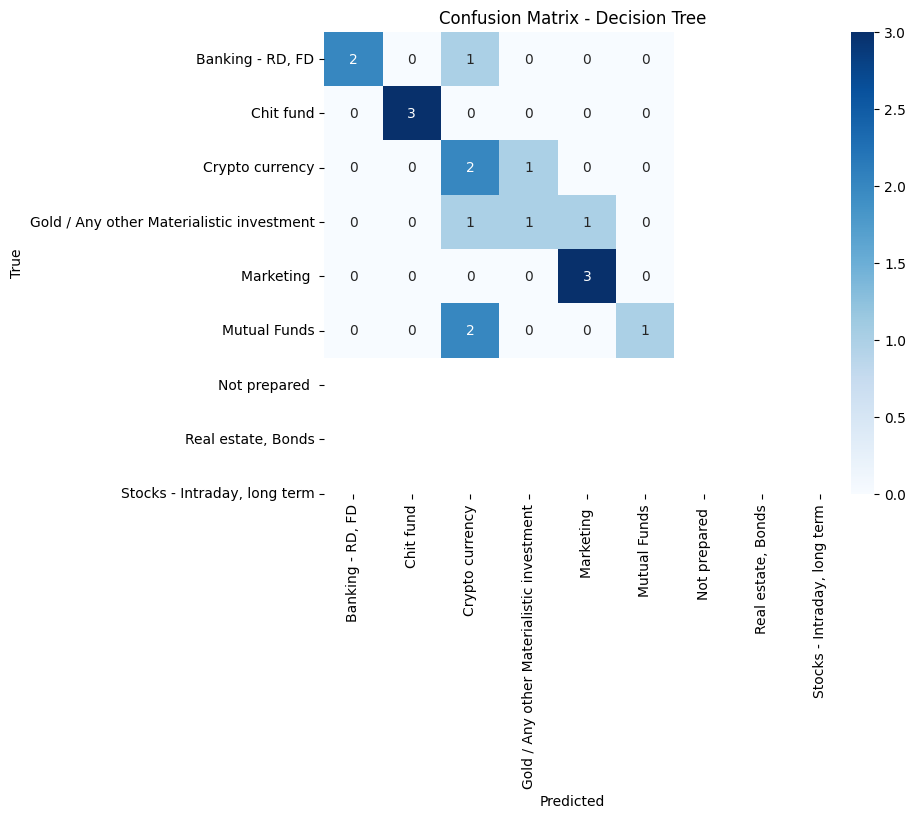

In [38]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=mode_of_investment_encoder.classes_, yticklabels=mode_of_investment_encoder.classes_)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Naive Bayes**

Naive Bayes Accuracy: 72.22%


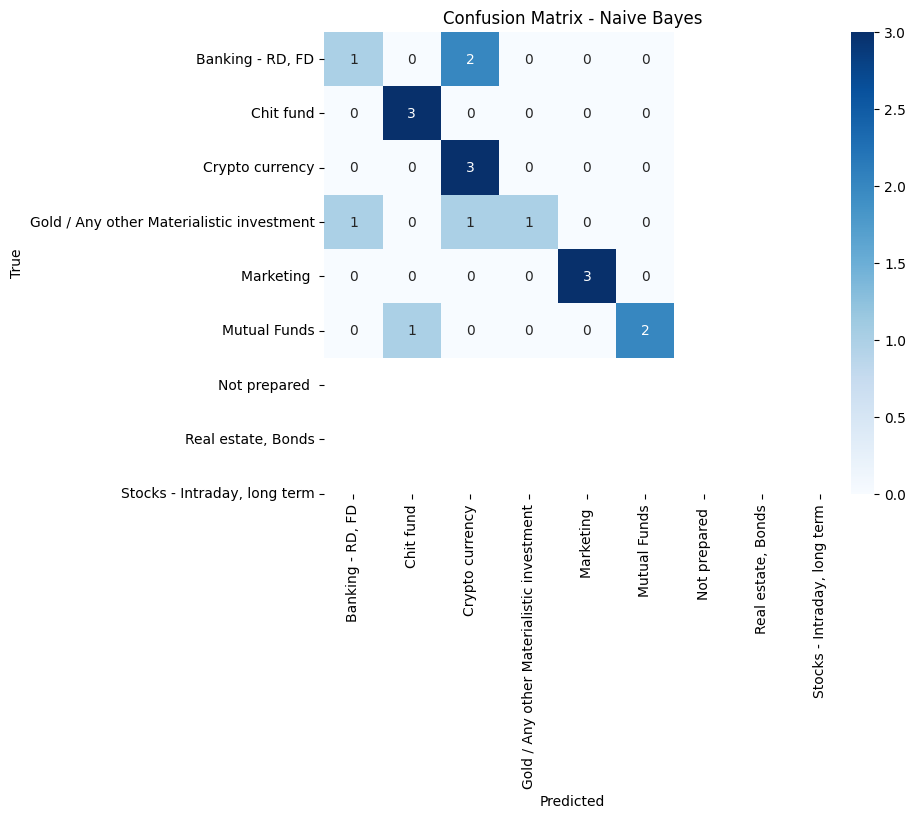

In [39]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=mode_of_investment_encoder.classes_, yticklabels=mode_of_investment_encoder.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Gradient Boosting**

Gradient Boosting Accuracy: 77.78%


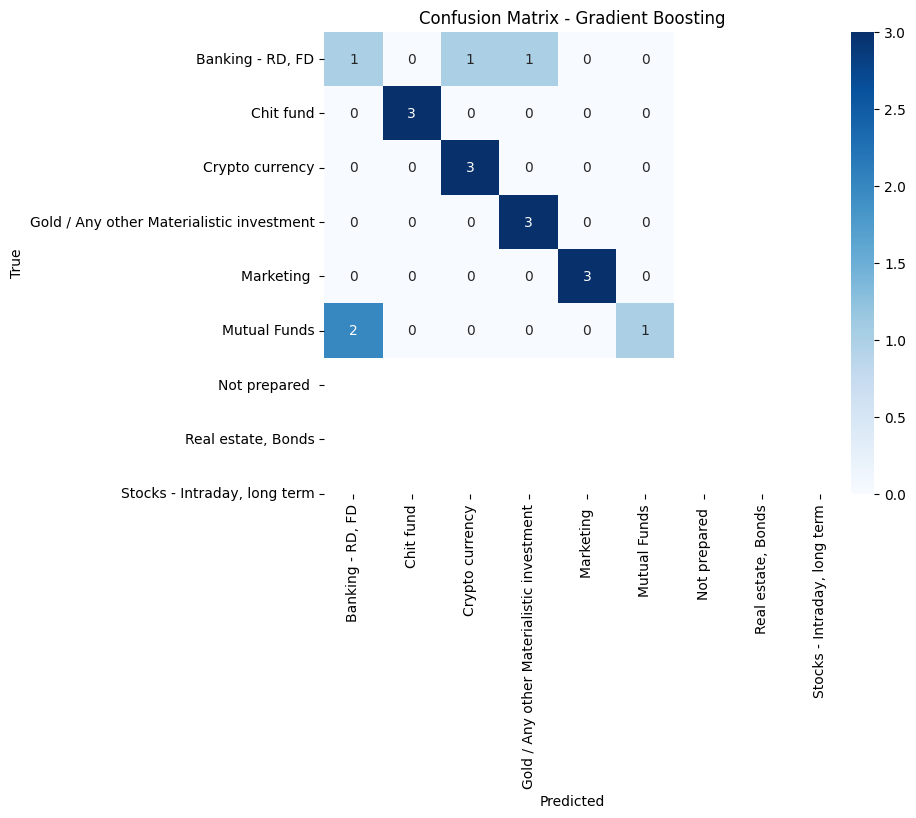

In [40]:
# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%")

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", xticklabels=mode_of_investment_encoder.classes_, yticklabels=mode_of_investment_encoder.classes_)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Ensemble Model**

Ensemble Model Accuracy: 83.33%


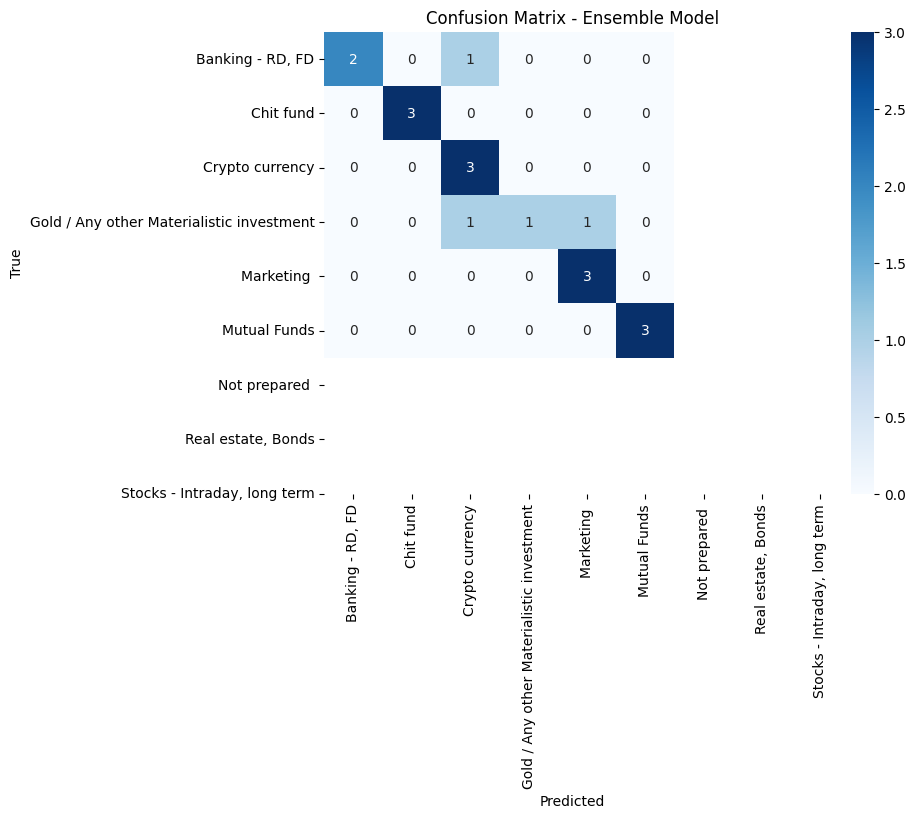

In [41]:
# Create Voting Classifier (Ensemble Model)
voting_clf = VotingClassifier(estimators=[
    ('lr', lr_model),
    ('knn', knn_model),
    ('dt', dt_model),
    ('nb', nb_model),
    ('rf', rf_model),
    ('svm', svm_model),
    ('gb', gb_model)
], voting='soft')  # 'hard' voting for majority class or 'soft' for probability

# Train Ensemble Model
voting_clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Ensemble Model Accuracy: {accuracy_voting * 100:.2f}%")

# Confusion Matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting, annot=True, fmt="d", cmap="Blues", xticklabels=mode_of_investment_encoder.classes_, yticklabels=mode_of_investment_encoder.classes_)
plt.title("Confusion Matrix - Ensemble Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Deep Learning**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.1016 - loss: 2.2050 - val_accuracy: 0.1562 - val_loss: 2.1741
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1942 - loss: 2.1653 - val_accuracy: 0.3750 - val_loss: 2.1093
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2641 - loss: 2.1211 - val_accuracy: 0.5938 - val_loss: 2.0484
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3865 - loss: 2.0652 - val_accuracy: 0.6250 - val_loss: 1.9861
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4630 - loss: 1.9759 - val_accuracy: 0.6250 - val_loss: 1.9218
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4826 - loss: 1.9172 - val_accuracy: 0.6250 - val_loss: 1.8513
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4610 - loss: 1.9023 - val_accuracy: 0.6250 - val_loss: 1.7829
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5464 - loss: 1.7951 - val_accuracy: 0.6250 - val_loss: 1.7081

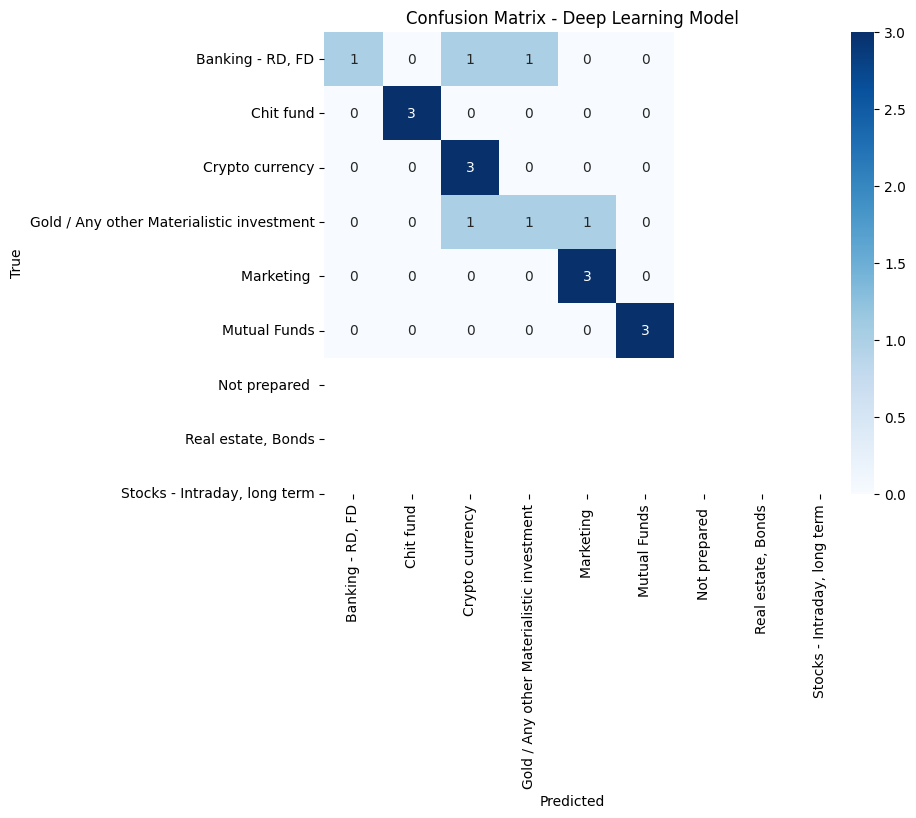

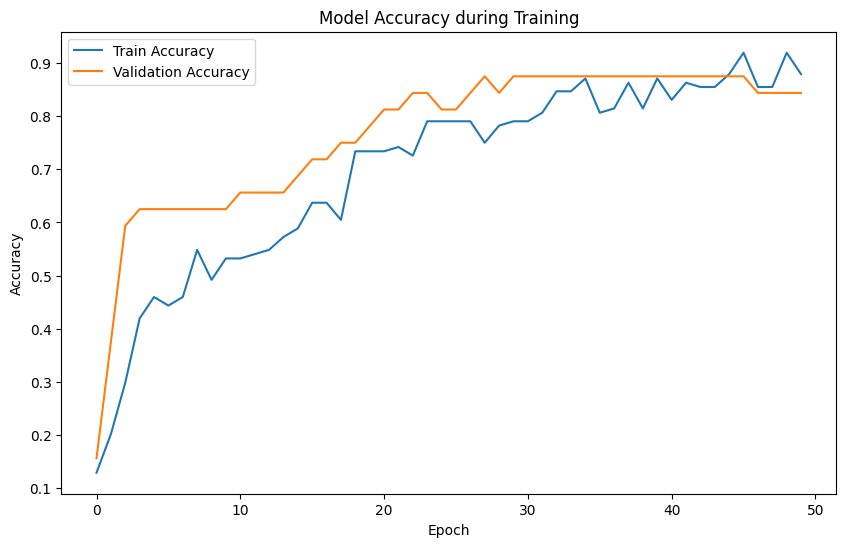

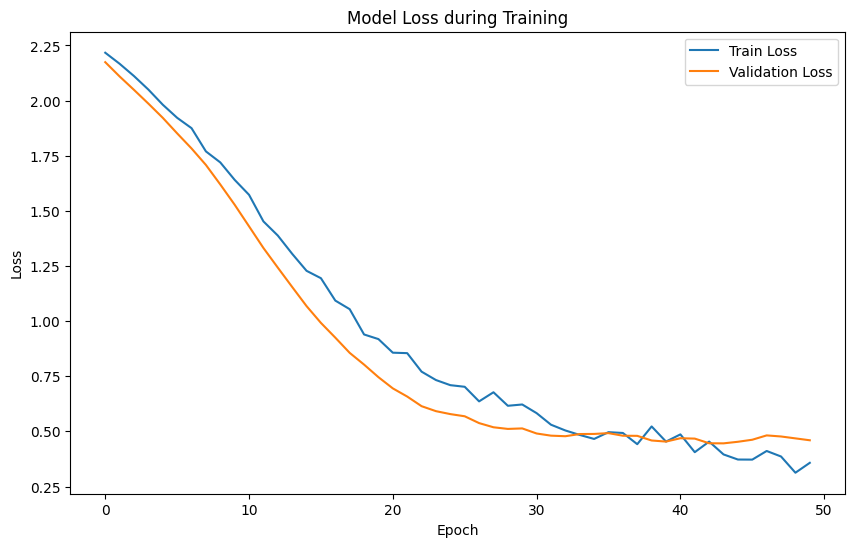

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Deep Learning Model
def create_dl_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))  # Input layer + first hidden layer
    model.add(Dropout(0.2))  # Dropout to prevent overfitting
    model.add(Dense(64, activation='relu'))  # Second hidden layer
    model.add(Dropout(0.2))  # Dropout to prevent overfitting
    model.add(Dense(32, activation='relu'))  # Third hidden layer
    model.add(Dense(9, activation='softmax'))  # Output layer (9 classes for Mode_of_investment)
    return model

# Create and compile the model
input_dim = X_train.shape[1]  # Number of input features
dl_model = create_dl_model(input_dim)
dl_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = dl_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred_dl = dl_model.predict(X_test)
y_pred_dl = y_pred_dl.argmax(axis=1)  # Get the index of the highest probability as the predicted label

# Calculate accuracy
accuracy_dl = accuracy_score(y_test, y_pred_dl)
print(f"Deep Learning Model Accuracy: {accuracy_dl * 100:.2f}%")

# Confusion Matrix
cm_dl = confusion_matrix(y_test, y_pred_dl)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dl, annot=True, fmt="d", cmap="Blues", xticklabels=mode_of_investment_encoder.classes_, yticklabels=mode_of_investment_encoder.classes_)
plt.title("Confusion Matrix - Deep Learning Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy during Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Hyperparameter Tuning for Random Forest**

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Apply GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Get best parameters and score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

# Use the best model
best_rf_model = grid_search_rf.best_estimator_

# Evaluate on the test set
accuracy_rf_tuned = best_rf_model.score(X_test, y_test)
print(f"Tuned Random Forest Accuracy: {accuracy_rf_tuned * 100:.2f}%")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.7692307692307693
Tuned Random Forest Accuracy: 77.78%


**Hyper Parameter tuning With SVM Classifier**

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the SVM model
svm_model = SVC(probability=True, random_state=42)

# Define hyperparameters for tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Apply GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=3, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

# Get best parameters and score
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best score for SVM:", grid_search_svm.best_score_)

# Use the best model
best_svm_model = grid_search_svm.best_estimator_

# Evaluate on the test set
accuracy_svm_tuned = best_svm_model.score(X_test, y_test)
print(f"Tuned SVM Accuracy: {accuracy_svm_tuned * 100:.2f}%")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best score for SVM: 0.7628205128205128
Tuned SVM Accuracy: 83.33%


**Stacking Classifier**

Stacking Model with Hyperparameter-Tuned Random Forest Meta-Model Accuracy: 88.89%


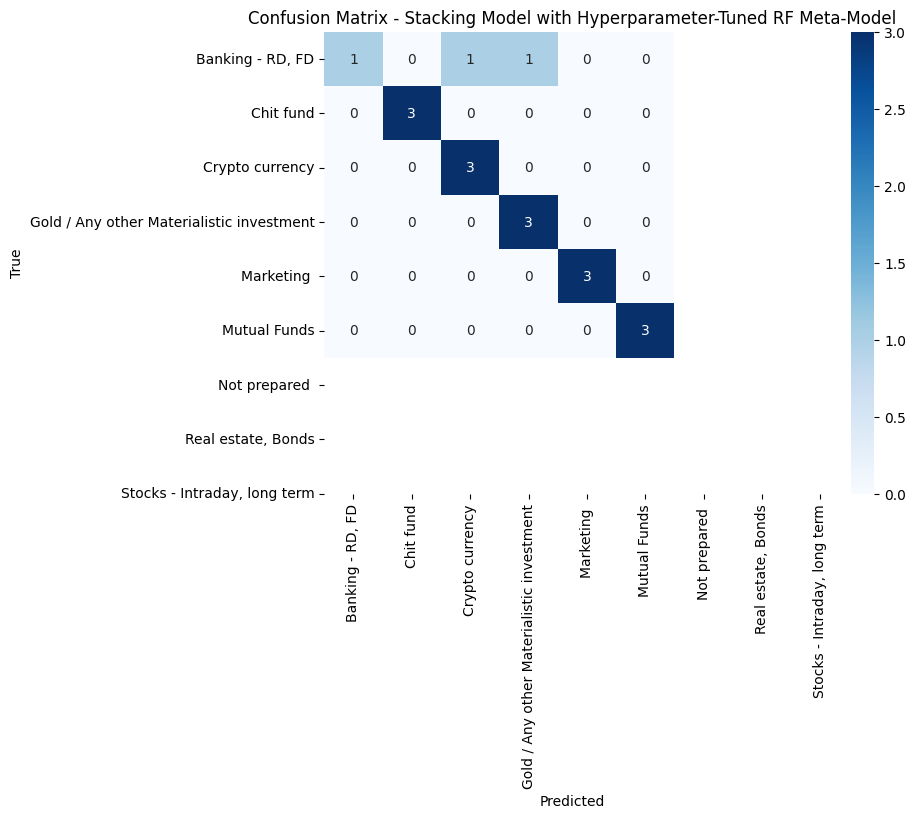

In [45]:
from sklearn.ensemble import StackingClassifier

# Define base learners (your already trained models)
base_learners = [
    ('lr', lr_model),
    ('knn', knn_model),
    ('dt', dt_model),
    ('nb', nb_model),
    ('rf', rf_model),  # You can keep your previous RF model here
    ('svm', svm_model),
    ('gb', gb_model)
]

# Use the best hyperparameter-tuned RF model as the meta-model
stacking_clf_rf = StackingClassifier(estimators=base_learners, final_estimator=best_rf_model)

# Train the Stacking Classifier with the hyperparameter-tuned RF as the meta-model
stacking_clf_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_stacking_rf = stacking_clf_rf.predict(X_test)

# Calculate accuracy of the stacking model with RF as meta-model
accuracy_stacking_rf = accuracy_score(y_test, y_pred_stacking_rf)
print(f"Stacking Model with Hyperparameter-Tuned Random Forest Meta-Model Accuracy: {accuracy_stacking_rf * 100:.2f}%")

# Confusion Matrix for Stacking Model with Hyperparameter-Tuned RF
cm_stacking_rf = confusion_matrix(y_test, y_pred_stacking_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking_rf, annot=True, fmt="d", cmap="Blues", xticklabels=mode_of_investment_encoder.classes_, yticklabels=mode_of_investment_encoder.classes_)
plt.title("Confusion Matrix - Stacking Model with Hyperparameter-Tuned RF Meta-Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Accuracy Comparison of All Models**

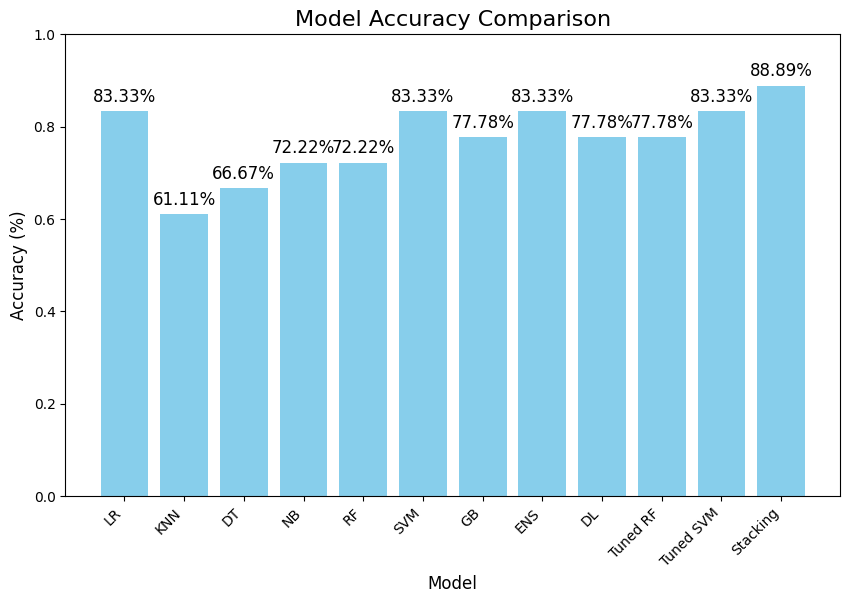

In [46]:
import matplotlib.pyplot as plt

# Define a list of models and their corresponding names
model_names = [
    "LR", "KNN", "DT", "NB", "RF", "SVM", "GB", "ENS", "DL", "Tuned RF","Tuned SVM", "Stacking"
]

accuracy_scores = []

# Logistic Regression Accuracy
accuracy_scores.append(accuracy_lr)

# KNN Accuracy
accuracy_scores.append(accuracy_knn)

# Decision Tree Accuracy
accuracy_scores.append(accuracy_dt)

# Naive Bayes Accuracy
accuracy_scores.append(accuracy_nb)

# Random Forest Accuracy
accuracy_scores.append(accuracy_rf)

# SVM Accuracy
accuracy_scores.append(accuracy_svm)

# Gradient Boosting Accuracy
accuracy_scores.append(accuracy_gb)

# Ensemble Model Accuracy (Voting Classifier)
accuracy_scores.append(accuracy_voting)

# Deep Learning Accuracy
accuracy_scores.append(accuracy_dl)

# Hyper Tuned Random Forest Accuracy
accuracy_scores.append(accuracy_rf_tuned)

# Hyper Tuned SVM Accuracy
accuracy_scores.append(accuracy_svm_tuned)

# Stacking Classifier Accuracy
accuracy_scores.append(accuracy_stacking_rf)

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(model_names, accuracy_scores, color='skyblue')

# Add title and labels
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xlabel("Model", fontsize=12)

# Set the y-axis range from 0 to 100%
plt.ylim(0, 1)

# Display accuracy percentage on bars
for index, value in enumerate(accuracy_scores):
    plt.text(index, value + 0.02, f"{value * 100:.2f}%", ha='center', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

# Apply Explainable AI

**Feature Importance**

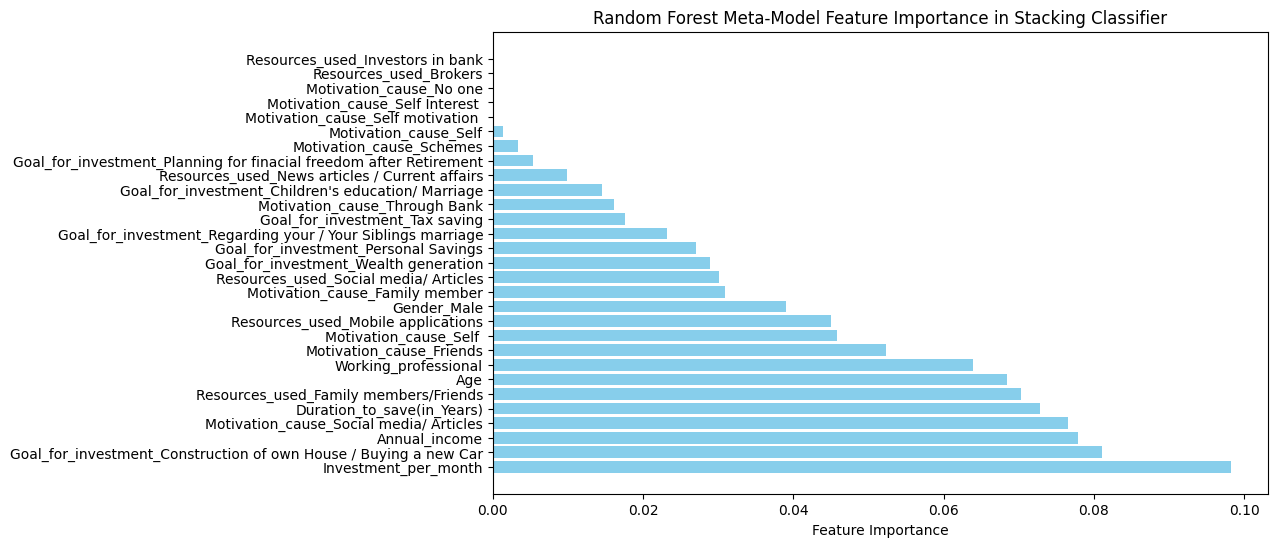

In [47]:
feature_importances = stacking_clf_rf.final_estimator.feature_importances_

# Get the feature names (in the same order as the features were provided to the model)
features = X.columns

# Create a bar plot to show feature importance
plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importances)[::-1]  # Sort feature importances in descending order
plt.barh(features[indices], feature_importances[indices], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Meta-Model Feature Importance in Stacking Classifier')
plt.show()

**LIME (Local Interpretable Model-agnostic Explanations)**

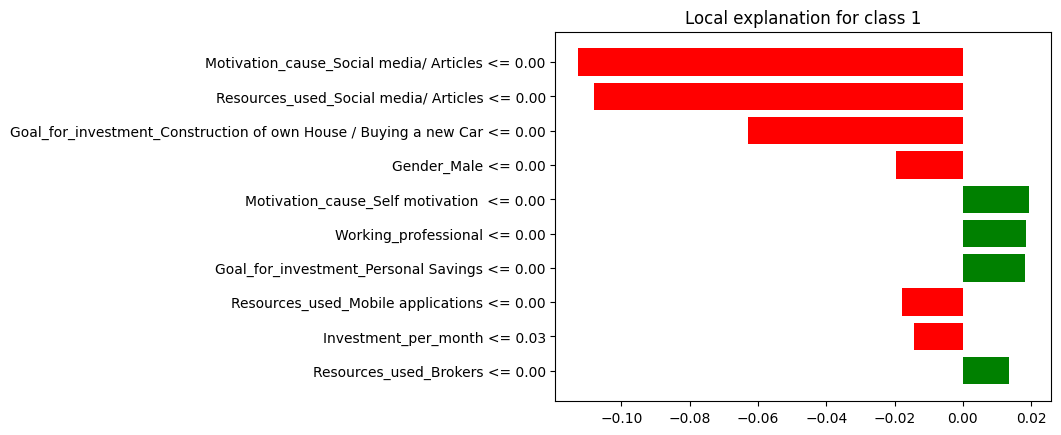

In [48]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize the LIME explainer with the training data
explainer = LimeTabularExplainer(X_train, mode='classification',
                                 training_labels=y_train, feature_names=X.columns)

# Choose a random sample to explain (e.g., the first sample in X_test)
idx = 0
exp = explainer.explain_instance(X_test[idx], stacking_clf_rf.predict_proba, num_features=10)

# Show the explanation
exp.show_in_notebook(show_table=True, show_all=False)

# Alternatively, plot the explanation
exp.as_pyplot_figure()
plt.show()

# Predictive System

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML
from lime.lime_tabular import LimeTabularExplainer

# Load dataset
df = pd.read_csv("investment_survey.csv")

# Process dataset
categorical_columns = ['Gender', 'Motivation_cause', 'Resources_used', 'Goal_for_investment']
X = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

mode_of_investment_encoder = LabelEncoder()
df['Mode_of_investment_numeric'] = mode_of_investment_encoder.fit_transform(df['Mode_of_investment'])
X = X.drop(columns=["Mode_of_investment", "Mode_of_investment_numeric"])
y = df["Mode_of_investment_numeric"]

# Remove classes with only one sample
class_counts = y.value_counts()
classes_with_one_sample = class_counts[class_counts == 1].index.tolist()
if classes_with_one_sample:
    mask = ~y.isin(classes_with_one_sample)
    X = X[mask]
    y = y[mask]

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Balance classes
smote = SMOTE(random_state=42, k_neighbors=3)
X_balanced, y_balanced = smote.fit_resample(X_normalized, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.1, random_state=42, stratify=y_balanced)

# Define base learners
base_learners = [
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB()),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svm', SVC(probability=True)),
    ('gb', GradientBoostingClassifier())
]

# Train stacking classifier
stacking_clf_rf = StackingClassifier(estimators=base_learners, final_estimator=best_rf_model)
stacking_clf_rf.fit(X_train, y_train)

# Input widgets
gender_widget = widgets.Dropdown(options=[('Male', 1), ('Female', 0)], description='Gender:')
age_widget = widgets.IntSlider(value=25, min=18, max=100, step=1, description='Age:')
working_professional_widget = widgets.Dropdown(options=[('Working', 1), ('Not Working', 0)], description='Working Professional:')
annual_income_widget = widgets.IntText(value=0, description='Annual Income:')
investment_per_month_widget = widgets.IntText(value=0, description='Investment per Month:')
goal_for_investment_widget = widgets.Dropdown(
    options=[
        ('Wealth generation', 0),
        ('Planning for financial freedom after Retirement', 1),
        ('Personal Savings', 2),
        ('Children\'s education/ Marriage', 3),
        ('Regarding your / Your Siblings marriage', 4),
        ('Construction of own House / Buying a new Car', 5),
        ('Tax saving', 6)
    ],
    description='Goal for Investment:',
    value=0
)
duration_widget = widgets.IntSlider(value=5, min=1, max=40, step=1, description='Duration (years):')

# Align user input to model's feature set
def transform_user_input(user_input):
    input_df = pd.DataFrame([user_input], columns=['Gender', 'Age', 'Working_professional', 'Annual_income', 'Investment_per_month', 'Goal_for_investment', 'Duration_to_save(in_Years)'])
    input_encoded = pd.get_dummies(input_df, columns=['Gender', 'Goal_for_investment'], drop_first=True)
    missing_cols = set(X.columns) - set(input_encoded.columns)
    for col in missing_cols:
        input_encoded[col] = 0
    input_encoded = input_encoded[X.columns]
    return input_encoded

def predict_mode_of_investment(user_input):
    user_input_transformed = transform_user_input(user_input)
    user_input_scaled = scaler.transform(user_input_transformed)
    prediction = stacking_clf_rf.predict(user_input_scaled)
    mode_of_investment = mode_of_investment_encoder.inverse_transform(prediction)
    return mode_of_investment[0]

def explain_prediction(user_input):
    explainer = LimeTabularExplainer(X_train, mode='classification', training_labels=y_train, feature_names=X.columns)
    user_input_transformed = transform_user_input(user_input)
    user_input_scaled = scaler.transform(user_input_transformed)
    exp = explainer.explain_instance(user_input_scaled[0], stacking_clf_rf.predict_proba, num_features=10)
    exp.show_in_notebook(show_table=True, show_all=False)
    exp.as_pyplot_figure()
    plt.show()

def on_button_click(b):
    user_input = [
        gender_widget.value,
        age_widget.value,
        working_professional_widget.value,
        annual_income_widget.value,
        investment_per_month_widget.value,
        goal_for_investment_widget.value,
        duration_widget.value
    ]
    print("User Input:", user_input)  # Debug: Check the collected input values
    try:
        predicted_mode = predict_mode_of_investment(user_input)
        print(f"Predicted Mode of Investment: {predicted_mode}")
        explain_prediction(user_input)
    except Exception as e:
        print(f"Error during prediction: {e}")  # Debug: Catch any exceptions

# Create the button
button = widgets.Button(description="Predict and Explain")

# Customize the button style (e.g., change color)
button.style.button_color = 'lightgreen'

# Attach the event handler
button.on_click(on_button_click)

display(gender_widget, age_widget, working_professional_widget, annual_income_widget, investment_per_month_widget, goal_for_investment_widget, duration_widget, button)


Dropdown(description='Gender:', options=(('Male', 1), ('Female', 0)), value=1)

IntSlider(value=25, description='Age:', min=18)

Dropdown(description='Working Professional:', options=(('Working', 1), ('Not Working', 0)), value=1)

IntText(value=0, description='Annual Income:')

IntText(value=0, description='Investment per Month:')

Dropdown(description='Goal for Investment:', options=(('Wealth generation', 0), ('Planning for financial freed…

IntSlider(value=5, description='Duration (years):', max=40, min=1)

Button(description='Predict and Explain', style=ButtonStyle(button_color='lightgreen'))